Import the Depedencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [ ]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('/content/car data.csv')

In [ ]:
#inspecting the first five rows of the data frame
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
#checking the number of rows and column
car_dataset.shape

(301, 9)

In [ ]:
#get some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# Checking number of missing values
car_dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [ ]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding the Categorical Data

In [ ]:
# Encoding "Fuel_ Type" column
car_dataset.replace({"Fuel_Type":{'Petrol':0, 'Diesel':1,'CNG':2}},inplace=True)

# Encoding "Seller Type" column
car_dataset.replace({"Seller_Type":{'Dealer':0, 'Individual':1}},inplace=True)

# Encoding "Transmission"column
car_dataset.replace({"Transmission":{'Manual':0, 'Automatic':1}},inplace=True)


/tmp/ipython-input-34-2064155185.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({"Transmission":{'Manual':0, 'Automatic':1}},inplace=True)


In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data and target

In [ ]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [ ]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type Seller_Type Transmission  Owner
0    2014           5.59       27000          0           0            0      0
1    2013           9.54       43000          1           0            0      0
2    2017           9.85        6900          0           0            0      0
3    2011           4.15        5200          0           0            0      0
4    2014           6.87       42450          1           0            0      0
..    ...            ...         ...        ...         ...          ...    ...
296  2016          11.60       33988          1           0            0      0
297  2015           5.90       60000          0           0            0      0
298  2009          11.00       87934          0           0            0      0
299  2017          12.50        9000          1           0            0      0
300  2016           5.90        5464          0           0            0      0

[301 rows x 7 columns]


In [ ]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Spiliting test data and training data

In [ ]:
X_train ,X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=2)

Model Training

1. Linear Regression

In [ ]:
# 1. Loading the linear regression model
lin_reg_model=LinearRegression()

In [ ]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [ ]:
#Prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [ ]:
# Rsquared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error :", error_score)

R squared Error : 0.8799451660493711


Visualise the actual prices and predicted prices

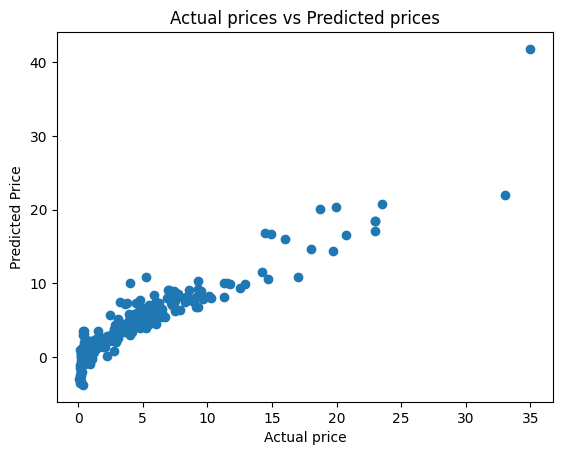

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted Price")
plt.title("Actual prices vs Predicted prices")
plt.show()

In [ ]:
# Predicted fot test data
test_data_prediction = lin_reg_model.predict(X_test)

In [ ]:
# Rsquared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error :", error_score)

R squared Error : 0.8365766715027051


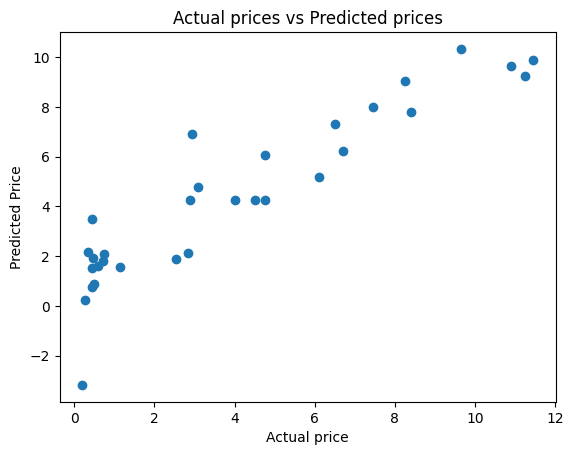

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted Price")
plt.title("Actual prices vs Predicted prices")
plt.show()

2. Lsso Regression

In [ ]:
# 1. Loading the lasso regression model
lass_reg_model=Lasso()

In [ ]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [ ]:
#Prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [ ]:
# Rsquared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error :", error_score)

R squared Error : 0.8427856123435794


Visualise the actual prices and predicted prices

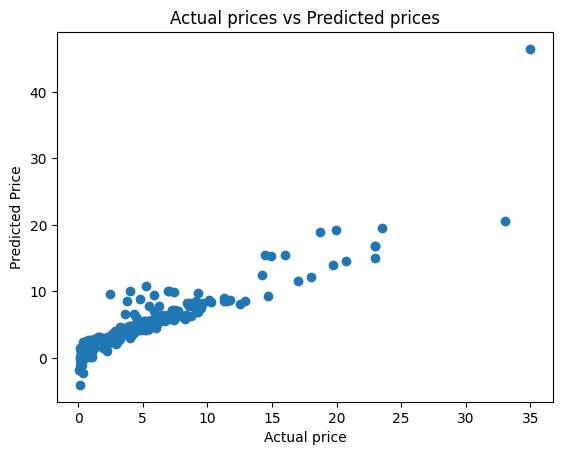

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted Price")
plt.title("Actual prices vs Predicted prices")
plt.show()

In [ ]:
# Predicted fot test data
test_data_prediction = lass_reg_model.predict(X_test)

In [ ]:
# Rsquared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error :", error_score)

R squared Error : 0.8709167941173195


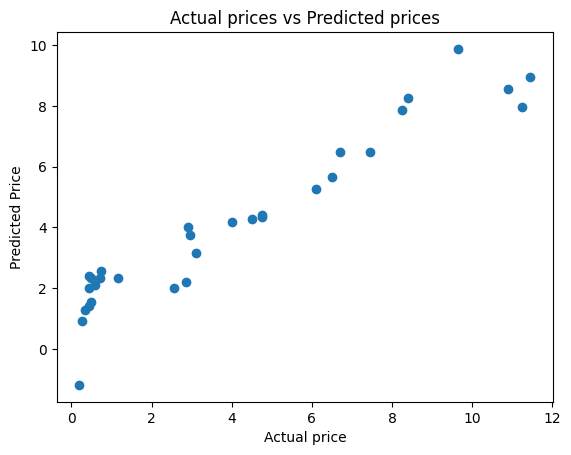

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted Price")
plt.title("Actual prices vs Predicted prices")
plt.show()